# 실습3 대출 신용정보 평가 (분류, 회귀)

대출 신용정보 평가를 위해 분류와 회귀 모델을 모두 사용하는 실습 코드를 준비했습니다. Kaggle에서 유명하고 풍부한 데이터셋인 "Loan Prediction Problem" 데이터셋을 사용하겠습니다.

데이터셋 링크: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

대출 상태를 분류하고
대출 금액을 회귀분석 하는 실습입니다.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로드
data = pd.read_csv('credit.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# 필요한 열 선택
data = data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
             'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
# Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History 열에는 결측값이 있습니다.
# 결측값을 자율적으로 처리해보세요.
data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'].fillna(data['Credit_History'].mode()[0])

,Credit_History
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
609,1.0
610,1.0
611,1.0
612,1.0


In [16]:
# 카테고리형 변수를 숫자로 매핑
le = LabelEncoder()
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    data[col] = le.fit_transform(data[col])

In [17]:
# 특성과 타겟 분리

# 학습용 데이터
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)

# 분류를 위한 평가 데이터
y_class = data['Loan_Status']

# 회귀를 위한 평가 데이터
y_reg = data['LoanAmount']

In [18]:
# 훈련 데이터와 검증 데이터 분리

# 분류용 데이터 분리
훈련용_data_분류, 테스트용_data_분류, 훈련용_target_분류, 테스트용_target_분류 = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

# 회귀용 데이터 분리
훈련용_data_회귀, 테스트용_data_회귀, 훈련용_target_회귀, 테스트용_target_회귀 = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

### (분류)로지스틱 회귀

In [19]:
# 모델 정의
lr = LogisticRegression(max_iter=2000)

In [20]:
# 모델 학습
lr.fit(훈련용_data_분류, 훈련용_target_분류)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [23]:
# 모델 추론
lr_예측결과 = lr.predict(테스트용_data_분류)

In [24]:
# 모델 평가

# 분류 보고서 출력
print("Logistic Regression Classification Report:")
print(classification_report(테스트용_target_분류, lr_예측결과))

# 혼동 행렬 출력
print("Confusion Matrix:")
print(confusion_matrix(테스트용_target_분류, lr_예측결과))

# 정확도 출력
print("Accuracy Score:")
print(accuracy_score(테스트용_target_분류, lr_예측결과))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]
Accuracy Score:
0.7886178861788617


### (분류)랜덤포레스트

In [25]:
# 모델 정의
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
# 모델 학습
rf.fit(훈련용_data_분류, 훈련용_target_분류)

RandomForestClassifier(random_state=42)

In [27]:
# 모델 추론
rf_예측결과 = rf.predict(테스트용_data_분류)

In [28]:
# 모델 평가

# 분류 보고서 출력
print("Logistic Regression Classification Report:")
print(classification_report(테스트용_target_분류, rf_예측결과))

# 혼동 행렬 출력
print("Confusion Matrix:")
print(confusion_matrix(테스트용_target_분류, rf_예측결과))

# 정확도 출력
print("Accuracy Score:")
print(accuracy_score(테스트용_target_분류, rf_예측결과))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123

Confusion Matrix:
[[18 25]
 [ 4 76]]
Accuracy Score:
0.7642276422764228


In [29]:
# Feature Importance 계산 및 시각화
feature_importances = rf.feature_importances_
feature_names = X.columns

In [30]:
# Feature Importance를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

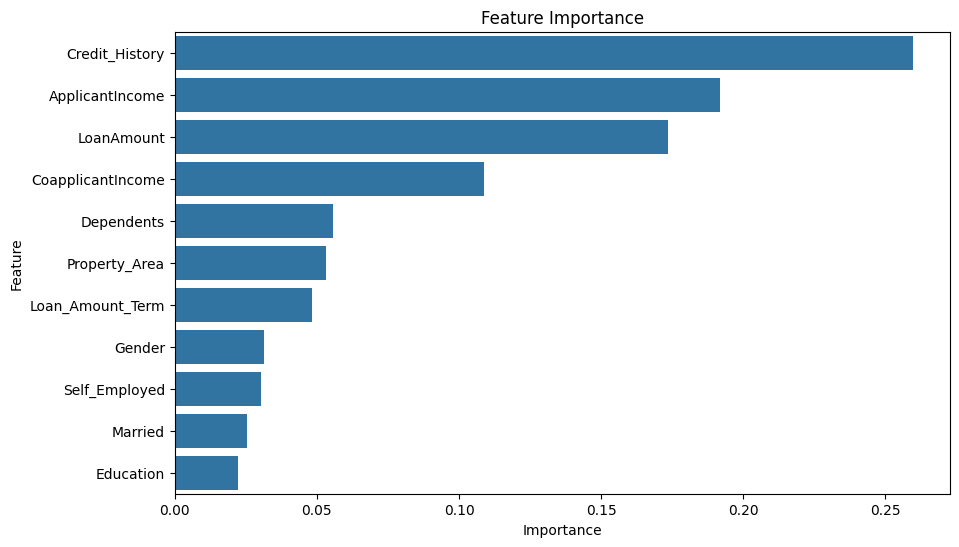

In [31]:
# Feature Importance 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### (회귀)선형회귀 모델

In [32]:
# 모델 정의
lr_reg = LinearRegression()

In [33]:
# 모델 학습
lr_reg.fit(훈련용_data_회귀, 훈련용_target_회귀)

LinearRegression()

In [34]:
# 모델 추론
lr_예측결과 = lr_reg.predict(테스트용_data_회귀)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# 회귀 모델 평가
print("\nLinear Regression:")

# 평균 제곱 오차 계산 및 출력
mse = mean_squared_error(테스트용_target_회귀, lr_예측결과)
print("Mean Squared Error:", mse)

# 회귀계수 값 계산 및 출력
r2 = r2_score(테스트용_target_회귀, lr_예측결과)
print("R-squared:", r2)


Linear Regression:
Mean Squared Error: 1.727243353000049e-24
R-squared: 1.0


# (회귀) 앙상블 기법을 이용한 회귀 알고리즘 적용

In [41]:
# 아무 앙상블 기법이나 이용해보세요.
from sklearn.ensemble import GradientBoostingRegressor

# 모델 정의 학습
gb = GradientBoostingRegressor(random_state=42)

# 모델 학습
gb.fit(훈련용_data_회귀, 훈련용_target_회귀)

# 모델 추론
gb_예측결과 = gb.predict(테스트용_data_회귀)

# 회귀 모델 평가
print("\nGradient Boosting Regressor:")

# 평균 제곱 오차 계산 및 출력
mse = mean_squared_error(테스트용_target_회귀, gb_예측결과)
print("Mean Squared Error:", mse)

# 회귀계수 값 계산 및 출력
r2 = r2_score(테스트용_target_회귀, gb_예측결과)
print("R-squared:", r2)



Gradient Boosting Regressor:
Mean Squared Error: 10.32306752884192
R-squared: 0.9981036743699183


### 데이터 시각화

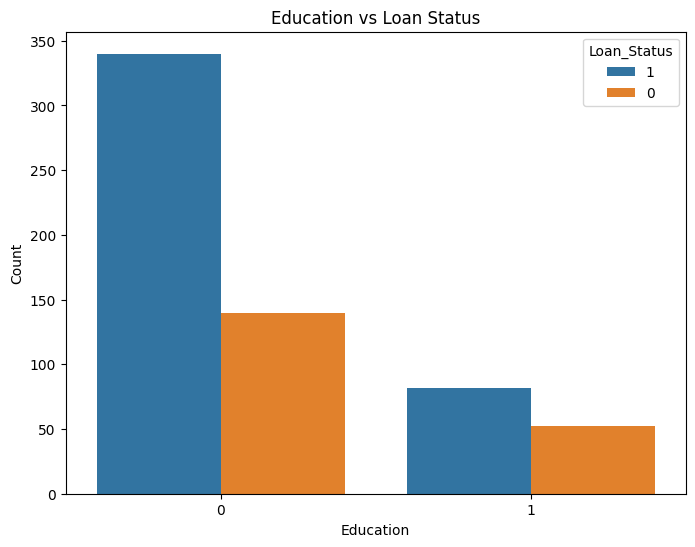

In [42]:
# 시각화
plt.figure(figsize=(8, 6))
# 데이터 복사 및 Loan_Status 열의 데이터 타입을 문자열로 변환
data_viz = data.copy()
data_viz['Loan_Status'] = data_viz['Loan_Status'].astype(str)
sns.countplot(x='Education', hue='Loan_Status', data=data_viz)
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

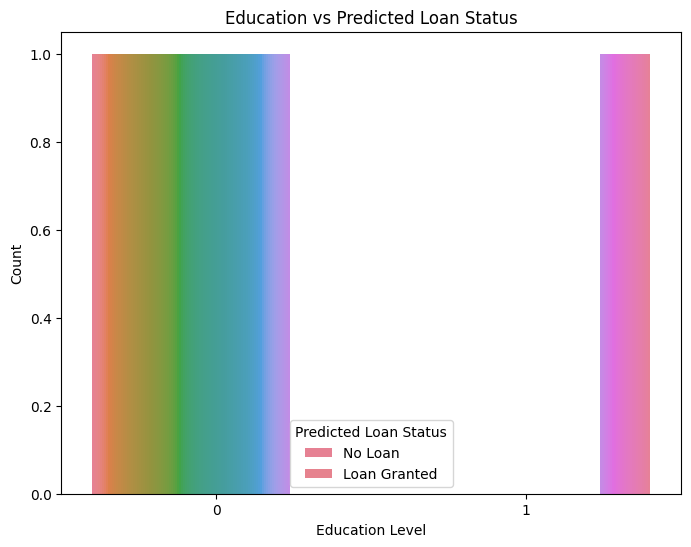

In [43]:
# 분류 결과에 대한 시각화
plt.figure(figsize=(8, 6))
# X_val 인덱스를 사용하여 원본 데이터에서 해당 행을 추출하고, 예측 결과를 문자열로 변환
viz_df = data.loc[data.index.isin(테스트용_data_분류.index)].copy()
viz_df['Predicted Loan Status'] = lr_예측결과.astype(str)
sns.countplot(x='Education', hue='Predicted Loan Status', data=viz_df)
plt.title('Education vs Predicted Loan Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Predicted Loan Status', labels=['No Loan', 'Loan Granted'])
plt.show()

# 실습4

In [83]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 테스트 데이터 로드
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [84]:
# 필요한 열 선택
test_data = test_data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
             'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [88]:
test_data['Gender'] = test_data['Gender'].fillna(test_data['Gender'].mode()[0])
test_data['Married'] = test_data['Married'].fillna(test_data['Married'].mode()[0])
test_data['Dependents'] = test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0])
test_data['Credit_History'] = test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0])

In [86]:
# 카테고리형 변수를 숫자로 매핑
le = LabelEncoder()
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    test_data[col] = le.fit_transform(test_data[col])

In [89]:
# 특성 선택
X_test = test_data.drop(['Loan_ID'], axis=1)

# 분류 모델을 사용하여 대출 상태 예측
y_class_pred_test = lr.predict(X_test)
y_class_pred_rf_test = rf.predict(X_test)

# 회귀 모델을 사용하여 대출 금액 예측
y_reg_pred_test = lr_reg.predict(X_test)

# 예측 결과를 데이터프레임으로 저장
pred_df = pd.DataFrame({
    'Loan_ID' : test_data['Loan_ID'],
    'Loan_Status_Logisric_Regression': y_class_pred_test,
    'Loan_Status_Random_Forest': y_class_pred_rf_test,
    'Loan_Amount_Linear_Regression': y_reg_pred_test
})
# 예측 결과를 CSV 파일로 저장
pred_df.to_csv('loan_predictions.csv', index=False)